-----------N = 10-----------
Point No.0: D = 0.7047294287555196, y = 0.6321205588285577, D-y = 0.07260886992696192
Point No.1: D = 0.6985565892493467, y = 0.6380709867540386, D-y = 0.0604856024953081
Point No.2: D = 0.7047294287555196, y = 0.6550801839675879, D-y = 0.049649244787931646
Point No.3: D = 0.7219484021148439, y = 0.6819852027356803, D-y = 0.039963199379163594
Point No.4: D = 0.7490507583954088, y = 0.7177453917029566, D-y = 0.03130536669245221
Point No.5: D = 0.7849961415002418, y = 0.7614295351215459, D-y = 0.023566606378695898
Point No.6: D = 0.8288537065004724, y = 0.8122043445278164, D-y = 0.016649361972655985
Point No.7: D = 0.8797905921439536, y = 0.8693241606422619, D-y = 0.010466431501691686
Point No.8: D = 0.9370616067840275, y = 0.9321217382246338, D-y = 0.004939868559393656
Point No.9: D = 1.0, y = 1.0, D-y = 0.0
----------------------------
-----------N = 20-----------
Point No.0: D = 0.6659172951400014, y = 0.6321205588285577, D-y = 0.033796736311443754
Point N

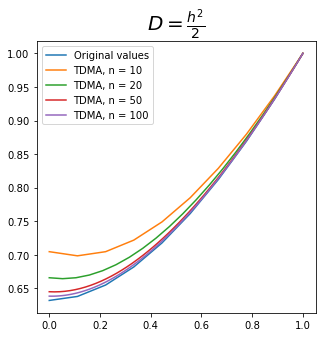

In [209]:
import matplotlib.pyplot as plt
from math import exp
import numpy as np

def progon3d(a, b, c, d):
    c[0] = c[0] / b[0]
    d[0] = - d[0] / b[0]
    ker = 0
    for k in range(1, n + 1):
        if b[k - 2] == 0.0:
            ker = k
        fac = b[k-1] - a[k-1] * c[k - 2]
        c[k - 1] = c[k - 1] / fac
        d[k - 1] = (a[k - 1] * d[k - 2] - d[k - 1]) / fac
    if b[n - 1] == 0.0:
        ker = k
    for k in range(n - 2, -1, -1):
        if b[k - 1] == 0.0:
            ker = k   
        d[k-1] += d[k] * c[k - 1]
    return d

def y_calc(n):
    t_val = np.linspace(0, 1, n)
    y_val = [x + exp(-x) - exp(-1) for x in t_val]
    return y_val

def plot_progon(n):
    h = 1 / (n - 1)
    a = [None]*n
    b = [None]*n
    c = [None]*n
    d = [None]*n

    c[0] = 1
    c[n - 1] = 0
    a[0] = 0
    a[n - 1] = 0
    b[0] = 1
    b[n - 1] = -1
    d[0] = h*h/2
    d[n - 1] = 1

    for i in range(2, n):
        b[i - 1] = 4
        d[i - 1] = 2 * h * h
        a[i - 1] = 2 - h
        c[i - 1] = 2 + h

    y = progon3d(a, b, c, d)
    y = [i + 1 for i in y]
    y[-1] -= 1
    plt.plot(np.linspace(0, 1, n), y,  label = "TDMA, n = {}".format(n))
    return y

def txt_progon(y, y_orig):
    print("-----------N = {}-----------".format(len(y)))
    i = 0
    for yi, yi_orig in zip(y, y_orig):
        print("Point No.{}: D = {}, y = {}, D-y = {}".format(i, yi, yi_orig, yi-yi_orig))
        i += 1
    print("----------------------------")

for n in [10, 20, 50, 100]:
    y_val = y_calc(n)
    if n == 10:
        plt.plot(np.linspace(0, 1, n), y_val,  label = "Original values")
    y = plot_progon(n)
    txt_progon(y, y_val)
plt.legend()
plt.title("$D =\\frac{h^2}{2}$", size = 20)
plt.rcParams["figure.figsize"] = (5, 5)
plt.show()

-----------N = 10-----------
Point No.0: D = 0.6676384061894396, y = 0.6321205588285577, D-y = 0.03551784736088193
Point No.1: D = 0.6676384061894396, y = 0.6380709867540386, D-y = 0.029567419435400977
Point No.2: D = 0.6793343126221881, y = 0.6550801839675879, D-y = 0.024254128654600193
Point No.3: D = 0.7014949774421327, y = 0.6819852027356803, D-y = 0.019509774706452432
Point No.4: D = 0.7330188471348318, y = 0.7177453917029566, D-y = 0.015273455431875194
Point No.5: D = 0.7729203211873635, y = 0.7614295351215459, D-y = 0.01149078606581766
Point No.6: D = 0.8203175465092195, y = 0.8122043445278164, D-y = 0.008113201981403084
Point No.7: D = 0.874421496650997, y = 0.8693241606422619, D-y = 0.005097336008735076
Point No.8: D = 0.9345262005790202, y = 0.9321217382246338, D-y = 0.002404462354386405
Point No.9: D = 1.0, y = 1.0, D-y = 0.0
----------------------------
-----------N = 50-----------
Point No.0: D = 0.6385836677546204, y = 0.6321205588285577, D-y = 0.006463108926062722
Point 

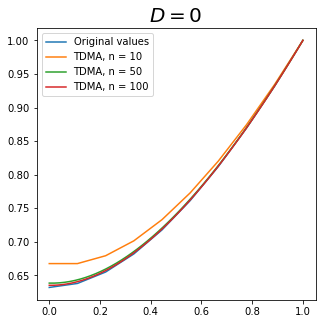

In [205]:
def plot_progon2(n):
    h = 1 / (n - 1)
    a = [None]*n
    b = [None]*n
    c = [None]*n
    d = [None]*n

    c[0] = 1
    c[n - 1] = 0
    a[0] = 0
    a[n - 1] = 0
    b[0] = 1
    b[n - 1] = -1
    d[0] = 0
    d[n - 1] = 1

    for i in range(2, n):
        b[i - 1] = 4
        d[i - 1] = 2 * h * h
        a[i - 1] = 2 - h
        c[i - 1] = 2 + h

    y = progon3d(a, b, c, d)
    y = [i + 1 for i in y]
    y[-1] -= 1
    plt.plot(np.linspace(0, 1, n), y,  label = "TDMA, n = {}".format(n))
    return y

for n in [10, 50, 100]:
    y_val = y_calc(n)
    if n == 10:
        plt.plot(np.linspace(0, 1, n), y_val,  label = "Original values")
    y = plot_progon2(n)
    txt_progon(y, y_val)
plt.legend()
plt.title("$D = 0$", size = 20)
plt.rcParams["figure.figsize"] = (5, 5)
plt.show()